<h4>PREGUNTAS ⁉️ / ANALISIS DE DATOS 📊
    
- 5. ¿Cual es la aparicion mas antigua y mas nueva , en que lugar nacio es superheroe y cual es su Alias?
    
- 6. ¿Cuantos superheroes buenos y malos existen? ¿Cual es la correlacion entre la aliniacion del superheroe y el editor?
     ¿Que editor tiene mas superheroes buenos y/o malos?<h4>

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import seaborn as sns

df = pd.read_csv("heroes_completo_limpio.csv")

def limpiar_y_extraer_año(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()
    
    # Normalizar nombres de columna
    df.columns = df.columns.str.strip()
    
    def extraer_año(texto):
        if pd.isna(texto):
            return np.nan
        coincidencia = re.search(r'\b(19\d{2}|20\d{2})\b', str(texto))
        if coincidencia:
            año = int(coincidencia.group(1))
            if 1900 <= año <= 2025: 
                return año
        return np.nan

    df['Año_Aparicion'] = df['Primera aparición'].apply(extraer_año).astype('Int64')
    
    # Reemplazar 'Sin dato' por NaN
    df.replace('Sin dato', np.nan, inplace=True)
    
    return df

def obtener_aparicion_antigua_y_nueva(df: pd.DataFrame) -> tuple[dict, dict]:

    df_años_validos = df.dropna(subset=['Año_Aparicion'])
    
    if df_años_validos.empty:
        return {}, {}
    
    claves = ['Nombre', 'Primera aparición', 'Lugar de nacimiento', 'Alias', 'Año_Aparicion']

    heroe_antiguo = df_años_validos.nsmallest(1, 'Año_Aparicion')[claves].iloc[0].to_dict()
    heroe_nuevo = df_años_validos.nlargest(1, 'Año_Aparicion')[claves].iloc[0].to_dict()
    
    return heroe_antiguo, heroe_nuevo


df_limpio = limpiar_y_extraer_año(df)

heroe_antiguo, heroe_nuevo = obtener_aparicion_antigua_y_nueva(df_limpio)

print("Héroe con aparición más antigua:\n", heroe_antiguo)
print("\nHéroe con aparición más reciente:\n", heroe_nuevo)


Héroe con aparición más antigua:
 {'Nombre': 'King Kong', 'Primera aparición': 'King Kong (1933)', 'Lugar de nacimiento': 'Skull Island', 'Alias': 'the 8th Wonder of the World, King of Skull Island', 'Año_Aparicion': 1933}

Héroe con aparición más reciente:
 {'Nombre': 'Jyn Erso', 'Primera aparición': 'Star Wars : Rogue One (2016)', 'Lugar de nacimiento': '-', 'Alias': '-', 'Año_Aparicion': 2016}


<h3> - ⏳ - SuperHeroe mas antiguo y mas nuevo -  🆕- <h3>

In [2]:
info_antigua, info_nueva = obtener_aparicion_antigua_y_nueva(df_limpio)
df_info_5 = pd.DataFrame({
    "MAS ANTIGUO": info_antigua,
    "MAS NUEVO": info_nueva
})
df_info_5

,MAS ANTIGUO,MAS NUEVO
Nombre,King Kong,Jyn Erso
Primera aparición,King Kong (1933),Star Wars : Rogue One (2016)
Lugar de nacimiento,Skull Island,-
Alias,"the 8th Wonder of the World, King of Skull Island",-
Año_Aparicion,1933,2016


<h3>🕑Calcular años desde que aparecieron los superheroes⌛<h3>

In [3]:
from datetime import datetime

año_actual = datetime.now().year

# Año de aparición del primer superhéroe
año_primero = info_antigua['Año_Aparicion']

# Año de aparición del superhéroe más nuevo
año_nuevo = info_nueva['Año_Aparicion']

# Calcular los años transcurridos desde la aparición
años_desde_primero = año_actual - año_primero

# Si el superhéroe ya apareció
if año_nuevo > año_actual:
    años_hasta_nuevo = año_nuevo - año_actual
    print(f"Han pasado {años_desde_primero} años desde que apareció el primer superhéroe ({info_antigua['Nombre']}).")
    print(f"Faltan {años_hasta_nuevo} años para que aparezca el más nuevo ({info_nueva['Nombre']}).")
else:
    años_desde_nuevo = año_actual - año_nuevo
    print(f"Han pasado {años_desde_primero} años desde que apareció el primer superhéroe ({info_antigua['Nombre']}).")
    print(f"Han pasado {años_desde_nuevo} años desde que apareció el más nuevo ({info_nueva['Nombre']}).")



Han pasado 92 años desde que apareció el primer superhéroe (King Kong).
Han pasado 9 años desde que apareció el más nuevo (Jyn Erso).


<h3> 🦸‍♂️🕑Héroe Más Antiguo, Más Nuevo y Media de Año de Aparición🕜🦹‍♂️ <h3>

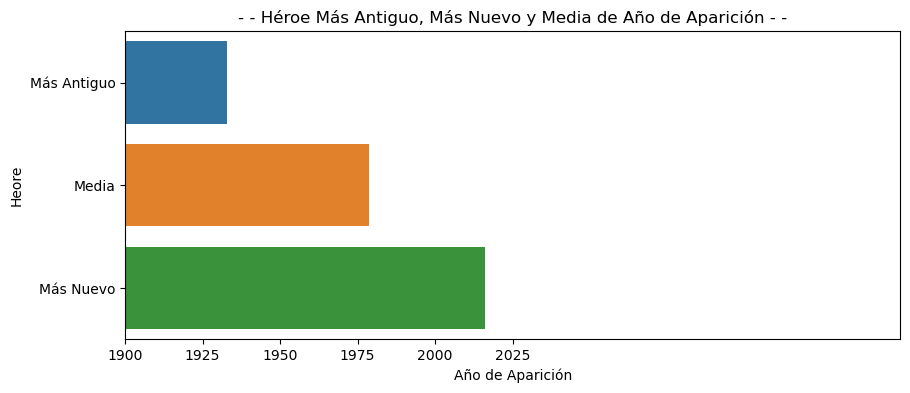

In [4]:
media_aparicion = df_limpio["Año_Aparicion"].mean()

df_grafico = pd.DataFrame({
    "Héroe": ["Más Antiguo", "Media", "Más Nuevo"],
    "Año_Aparicion": [
        info_antigua["Año_Aparicion"],
        media_aparicion,
        info_nueva["Año_Aparicion"]],
    "Nombre": [
        info_antigua["Nombre"],
        "Media General",
        info_nueva["Nombre"]]})



plt.figure(figsize=(10, 4))

sns.barplot(
    x="Año_Aparicion",
    y="Héroe",
    hue="Héroe",
    data=df_grafico,)

plt.title("- - Héroe Más Antiguo, Más Nuevo y Media de Año de Aparición - -")
plt.xlabel("Año de Aparición")
plt.ylabel("Heore")
plt.xlim(1900, 2150)
plt.xticks(range(1900, 2030, 25))

plt.show()

In [5]:
def contar_alineacion_por_editor(df: pd.DataFrame) -> pd.DataFrame:

    df['Alineación'] = df['Alineación'].replace({np.nan: 'Sin dato', '-': 'Sin dato'})
    
    tabla_conteo = pd.crosstab(df['Editor'], df['Alineación'], dropna=False)
    
    tabla_conteo['Total'] = tabla_conteo.sum(axis=1)
    
    orden_columnas = ['good', 'bad', 'neutral', 'Sin dato', 'Total']
    for col in orden_columnas:
        if col not in tabla_conteo.columns:
            tabla_conteo[col] = 0
            
    return tabla_conteo[orden_columnas]
    
    #crea una tabla con conteos y totales de alineación por editor

def obtener_resumen_alineacion(df_conteo: pd.DataFrame) -> tuple:
    
    total_buenos = df_conteo['good'].sum()
    total_malos = df_conteo['bad'].sum()
    
    # Editor con más 'good'
    editor_mas_buenos = df_conteo['good'].idxmax()
    
    # Editor con más 'bad'
    editor_mas_malos = df_conteo['bad'].idxmax()
    
    return total_buenos, total_malos, editor_mas_buenos, editor_mas_malos
    


<h3> 🦸‍♂️¿Cuantos superheroes buenos y malos existen y el TOTAL?🦹 <h3>

In [6]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)
df_info_6 = pd.DataFrame({
    "SUPERHEROES": ["Total buenos", "Total malos", "TOTAL"],
    "CANTIDAD": [total_buenos, total_malos, total_buenos + total_malos]
})
print("¿Cuantos superheroes buenos y malos existen y el TOTAL?")
df_info_6


¿Cuantos superheroes buenos y malos existen y el TOTAL?


,SUPERHEROES,CANTIDAD
0,Total buenos,494
1,Total malos,206
2,TOTAL,700


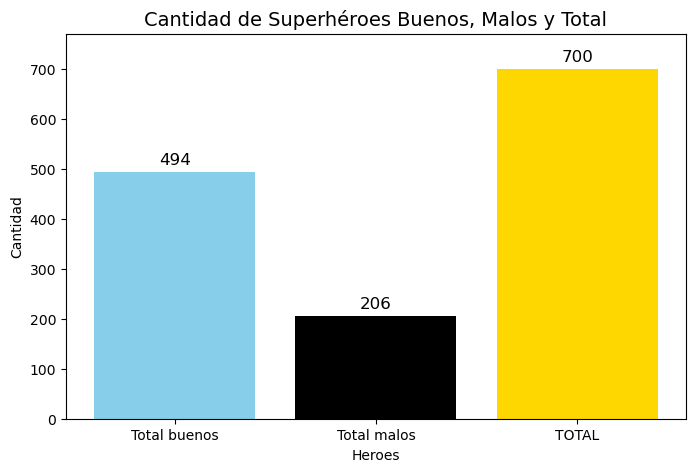

In [7]:
colores = ["skyblue", "black", "gold"] 
plt.figure(figsize=(8,5))
bars = plt.bar(df_info_6["SUPERHEROES"], df_info_6["CANTIDAD"], color=colores)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02*df_info_6["CANTIDAD"].max(),
             int(altura), ha='center', fontsize=12)

plt.title("Cantidad de Superhéroes Buenos, Malos y Total", fontsize=14)
plt.ylabel("Cantidad")
plt.xlabel("Heroes")
plt.ylim(0, df_info_6["CANTIDAD"].max() * 1.1)

plt.show()



In [8]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)

df_info_61 = pd.DataFrame({
    "EDITOR CON MAS BUENOS Y MALOS": ["Editor con más buenos", "Editor con más malos"],
    "EDITOR": [editor_mas_buenos, editor_mas_malos]
})
print(" ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##")
print(" ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##")
df_info_61

 ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##
 ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##


,EDITOR CON MAS BUENOS Y MALOS,EDITOR
0,Editor con más buenos,Marvel Comics
1,Editor con más malos,Marvel Comics


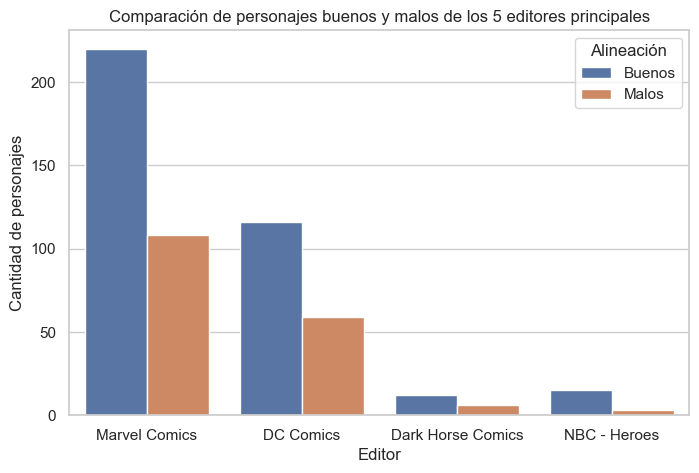

In [9]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)

#tomamos los 5 editores con mas personajes
top5_editores = tabla_alineacion.sort_values('Total', ascending=False).head(5)

#representamos los valores en cada fila con un solo valor 
df_plot = top5_editores[['good', 'bad']].reset_index().melt(
    id_vars='Editor', value_vars=['good', 'bad'],
    var_name='Alineación',
    value_name='Cantidad'
)

# Reemplazamos los valores 'good' y 'bad'
df_plot['Alineación'] = df_plot['Alineación'].replace({'good': 'Buenos', 'bad': 'Malos'})

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

barplot = sns.barplot(
    x='Editor',
    y='Cantidad',
    hue='Alineación',
    data=df_plot,
)

plt.title("Comparación de personajes buenos y malos de los 5 editores principales")
plt.ylabel("Cantidad de personajes")
plt.xlabel("Editor")
plt.legend(title="Alineación")
plt.show()



In [10]:
#correlacion de los 5 mas importantes
df_correlacion = df_limpio.dropna(subset=['Alineación', 'Editor']) #limpiamos para que no tengan datos vacios

conteo_editores = df_correlacion['Editor'].value_counts() # contamos cuantas veces aparecen los editores

top5_editores = conteo_editores.head(5).index.tolist() #tomamos los 5 mejores editores con mas registros

tabla_contingencia = pd.crosstab(df_correlacion['Editor'], df_correlacion['Alineación']) #Crea una tabla de contingencia  que muestra la frecuencia de cada combinación

tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100 #calculamos el porcentaje por fila

df_editor_alineacion = tabla_contingencia.astype(str) + " (" + tabla_porcentajes.round(1).astype(str) + "%)" #Combinamos conteo y porcentaje en un solo string

df_top5_alineacion = df_editor_alineacion.loc[top5_editores] # selecionamos 5
print("Correlacion de los 5 mas importantes🏆")
print("Segun la correlacion hecha se ve claramente que Marvel, DC Comics y Dark Horse Comics tienen mas correlacion entre buenos y malos ")
df_top5_alineacion



Correlacion de los 5 mas importantes🏆
Segun la correlacion hecha se ve claramente que Marvel, DC Comics y Dark Horse Comics tienen mas correlacion entre buenos y malos 


Alineación,Sin dato,bad,good,neutral
Editor,,,,
Marvel Comics,1 (0.3%),108 (31.9%),220 (64.9%),10 (2.9%)
DC Comics,1 (0.5%),59 (31.4%),116 (61.7%),12 (6.4%)
Dark Horse Comics,0 (0.0%),6 (33.3%),12 (66.7%),0 (0.0%)
NBC - Heroes,0 (0.0%),3 (16.7%),15 (83.3%),0 (0.0%)
Image Comics,1 (7.1%),11 (78.6%),2 (14.3%),0 (0.0%)


<h3>⬆️"Correlacion de los 5 mas importantes🏆"⬆️<h3>
<h4>"Segun la correlacion hecha se ve claramente que Marvel y DC Comics tienen mas correlacion entre buenos y malos.📊 <h4>

<h3>"Distribución de Alineación por los 5 Editores Más Importantes 🏆 "<h3>

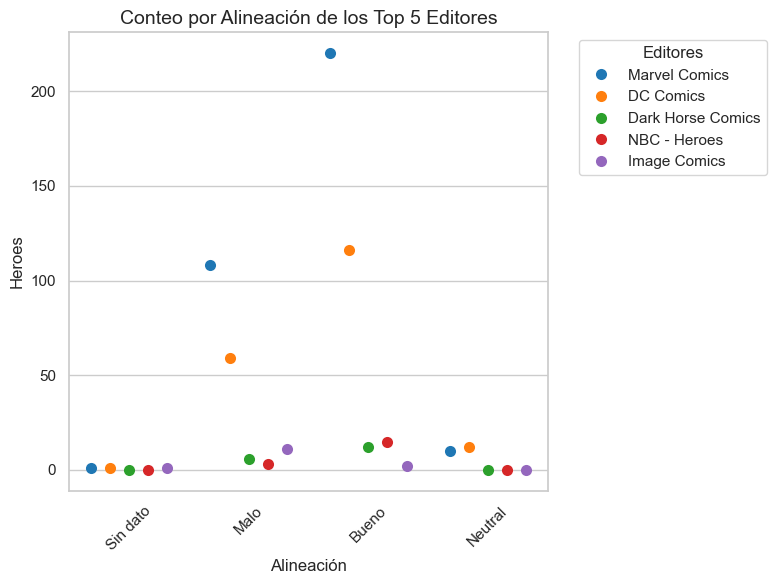

In [14]:
df_long['Alineación'] = df_long['Alineación'].replace({
    'bad': 'Malo',
    'good': 'Bueno',
    'neutral' : 'Neutral'
})

# Gráfico swarmplot
plt.figure(figsize=(8,6))
sns.swarmplot(
    data=df_long,
    x="Alineación",
    y="Conteo",
    hue="Editor",
    palette=palette,
    size=8,
    dodge=True
)

plt.title("Conteo por Alineación de los Top 5 Editores", fontsize=14)
plt.xlabel("Alineación")
plt.ylabel("Heroes")
plt.xticks(rotation=45)
plt.legend(title="Editores", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()



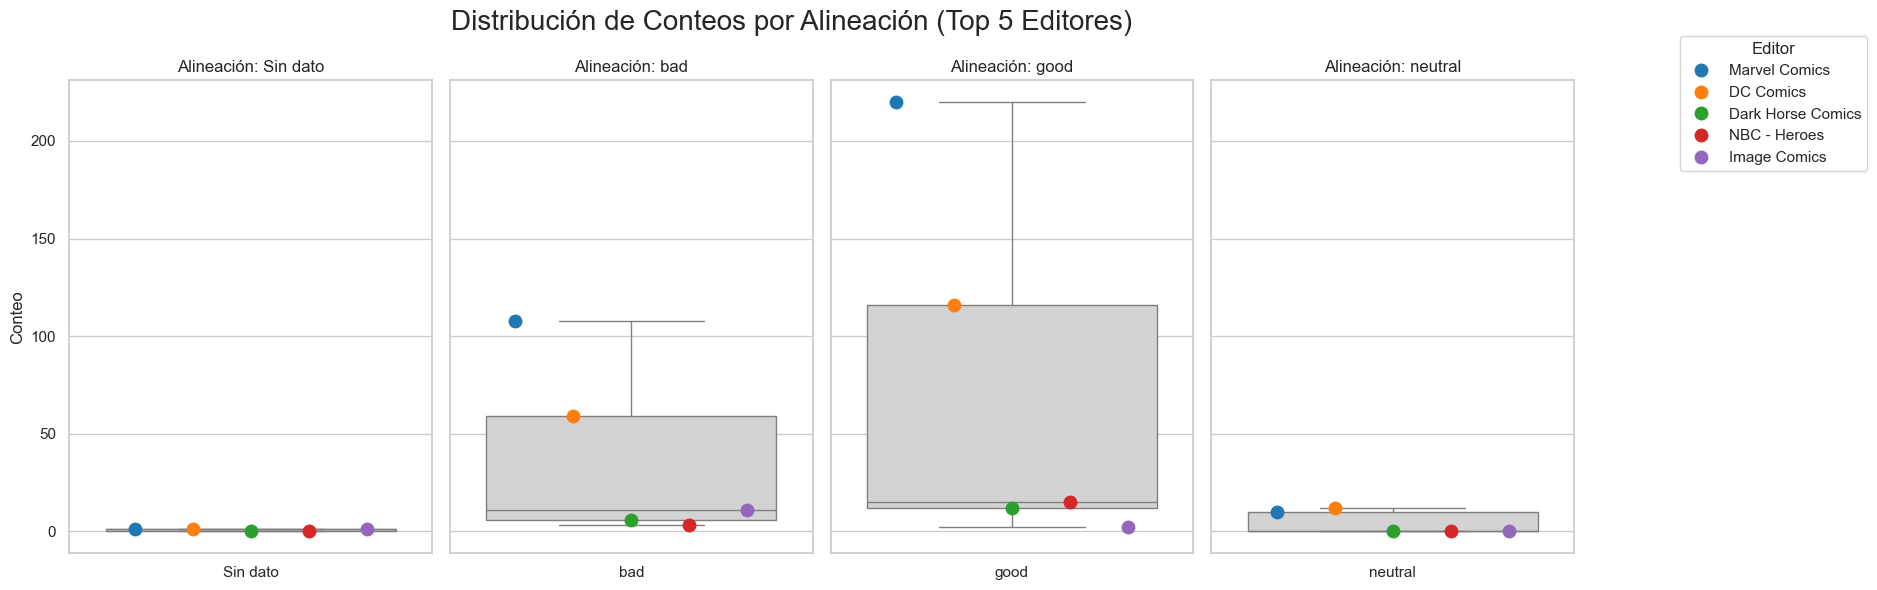

In [13]:
tabla_top5 = tabla_contingencia.loc[top5_editores].reset_index()

tabla_top5.rename(columns={tabla_top5.columns[0]: 'Editor'}, inplace=True)

df_long = tabla_top5.melt(id_vars="Editor", var_name="Alineación", value_name="Conteo")

sns.set(style="whitegrid")
palette = sns.color_palette("tab10", n_colors=len(top5_editores))
categorias = df_long['Alineación'].unique()
num_cat = len(categorias)
fig, axes = plt.subplots(1, num_cat, figsize=(4*num_cat, 6), sharey=True)

for ax, cat in zip(axes, categorias):
    subset = df_long[df_long['Alineación'] == cat]
    
    # Boxplot gris de distribución general
    sns.boxplot(
        data=subset,
        x="Alineación",
        y="Conteo",
        color="lightgray",
        showfliers=False,
        ax=ax
    )
    
    # Swarmplot de puntos individuales por editor
    sns.swarmplot(
        data=subset,
        x="Alineación",
        y="Conteo",
        hue="Editor",
        palette=palette,
        size=10,
        dodge=True,
        ax=ax
    )
    
    ax.set_title(f"Alineación: {cat}")
    ax.set_xlabel("")
    ax.set_ylabel("Conteo")
    ax.legend().remove() #elimanar leyendas repetidas , sino sale en cada grafico

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Editor", bbox_to_anchor=(1.05, 0.95), loc='upper left')

fig.suptitle("Distribución de Conteos por Alineación (Top 5 Editores)", fontsize=20)
plt.tight_layout()
plt.show()
